# Understanding Logistic Regression Tables

Using the same code as in the previous exercise, try to interpret the summary table.

### More information about the dataset: 
Note that <i> interest rate</i> indicates the 3-month interest rate between banks and <i> duration </i> indicates the time since the last contact was made with a given consumer. The <i> previous </i> variable shows whether the last marketing campaign was successful with this customer. The <i>March</i> and <i> May </i> are Boolean variables that account for when the call was made to the specific customer and <i> credit </i> shows if the customer has enough credit to avoid defaulting.

<i> Notes: 
    <li> the first column of the dataset is an index one; </li>
    <li> you don't need the graph for this exercise; </li>
    <li> the dataset used is much bigger </li>
</i>

## Import the relevant libraries

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [3]:
raw_data = pd.read_csv('Bank-data.csv', index_col=0)

raw_data.describe()

,interest_rate,credit,march,may,previous,duration
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000


In [4]:
raw_data.head(5)

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [5]:
data = raw_data.copy()

data['y'] = data['y'].map({'yes': 1, 'no': 0})

data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


### Declare the dependent and independent variables

Use 'duration' as the independent variable.

In [6]:
y = data['y']
x1 = data['duration']

### Simple Logistic Regression

Run the regression.

In [7]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y, x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


### Interpretation

In [8]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 Aug 2024   Pseudo R-squ.:                  0.2121
Time:                        17:17:10   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

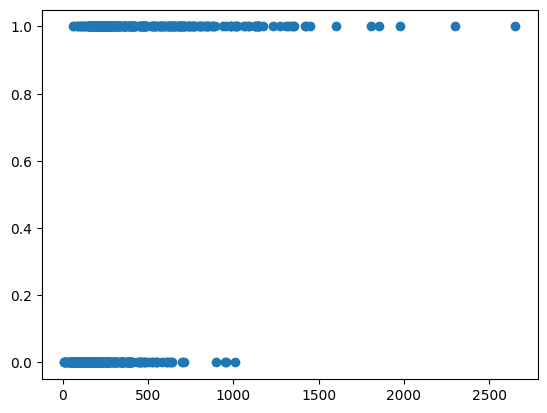

In [9]:
fig = plt.scatter(x1,y)
fig.x
